In [1]:
import itertools

import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from scipy import signal

import cv2

%matplotlib inline

from keras.models import Sequential    #Sequential搭积木一样的方式
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist
import keras.backend as K

import tensorflow as tf    #tf不设置会把GPU全部占满
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
import keras
keras.__version__

'2.2.2'

# 1. 神经网络

### 1.1 Synetic Data

In [3]:
#Generate the dataset，同心圆环数据集,shuffle随机打乱，
X, t = make_circles(n_samples = 5000, shuffle=False, factor=0.3, noise=0.1)

#Separate the red and blue point
x_red = X[t == 0]
x_blue = X[t == 1]

print('shape of X: {}'.format(X.shape))

shape of X: (5000, 2)


In [4]:
x_red.shape

(2500, 2)

In [5]:
x_red[:5]    # 连个feature

array([[ 1.16243454, -0.06117564],
       [ 0.94717967, -0.10478359],
       [ 1.08652813, -0.22512734],
       [ 1.17445275, -0.06858094],
       [ 1.03185338, -0.01488411]])

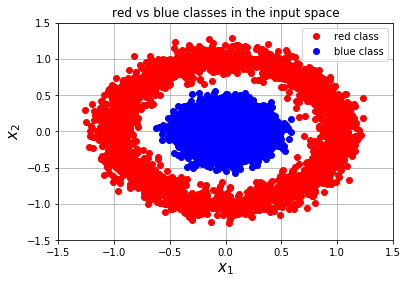

In [6]:
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='red class')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='blue class')

plt.grid()
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classes in the input space')
plt.show()

In [7]:
#Split dataset into trian and test
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size = 0.3, random_state = 0)

In [8]:
X_train.shape

(3500, 2)

### 1.2 Simple Logistic Regression
![logistic model](./imgs/SimpleANN02.png)

In [9]:
#Build the model with keras' sequential model
#model = Sequential()
#model.add(Dense(1, input_dim = 2, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))
#sgd = SGD(lr=0.001, decay = 1e-6, momentum = 0.9, nesterov = True)
#model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')
#history = model.fit(X_train, y_train, validation_data = (X_test, y_test), verbose = 1, batch_size = 64, epochs = 10)

In [10]:
model = Sequential()    #模型

In [11]:
#全连接层
model.add(Dense(1, input_dim = 2, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))    #glorot_normal参数初始化

In [12]:
# decay衰减， momentum是gama，nesterov往前看一步更新momentum
sgd = SGD(lr=0.001, decay = 1e-6, momentum = 0.9, nesterov = True)

In [13]:
# 如何优化
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [14]:
# 
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), verbose = 1, batch_size = 64, epochs = 10)

Train on 3500 samples, validate on 1500 samples
Epoch 1/10
3500/3500 [==============================] - 4s 1ms/step - loss: 0.7517 - acc: 0.5043 - val_loss: 0.7516 - val_acc: 0.5073
Epoch 2/10
3500/3500 [==============================] - 1s 290us/step - loss: 0.7463 - acc: 0.5034 - val_loss: 0.7464 - val_acc: 0.5047
Epoch 3/10
3500/3500 [==============================] - 1s 286us/step - loss: 0.7414 - acc: 0.5026 - val_loss: 0.7417 - val_acc: 0.5040
Epoch 4/10
3500/3500 [==============================] - 1s 310us/step - loss: 0.7369 - acc: 0.5011 - val_loss: 0.7373 - val_acc: 0.5020
Epoch 5/10
3500/3500 [==============================] - 1s 293us/step - loss: 0.7328 - acc: 0.4963 - val_loss: 0.7330 - val_acc: 0.4987
Epoch 6/10
3500/3500 [==============================] - 1s 298us/step - loss: 0.7289 - acc: 0.4971 - val_loss: 0.7293 - val_acc: 0.4987
Epoch 7/10
3500/3500 [==============================] - 1s 222us/step - loss: 0.7254 - acc: 0.4949 - val_loss: 0.7259 - val_acc: 0.4967
Ep

训练误差一直是0.50左右，就是瞎懵。

In [15]:
model = Sequential()
model.add(Dense(1, input_dim = 2, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), verbose = 1, batch_size = 64, epochs = 10)

Train on 3500 samples, validate on 1500 samples
Epoch 1/10
3500/3500 [==============================] - 0s 103us/step - loss: 0.7351 - acc: 0.5054 - val_loss: 0.7316 - val_acc: 0.4807
Epoch 2/10
3500/3500 [==============================] - 0s 51us/step - loss: 0.7307 - acc: 0.5023 - val_loss: 0.7278 - val_acc: 0.4773
Epoch 3/10
3500/3500 [==============================] - 0s 46us/step - loss: 0.7267 - acc: 0.4991 - val_loss: 0.7243 - val_acc: 0.4767
Epoch 4/10
3500/3500 [==============================] - 0s 48us/step - loss: 0.7230 - acc: 0.4969 - val_loss: 0.7211 - val_acc: 0.4747
Epoch 5/10
3500/3500 [==============================] - 0s 53us/step - loss: 0.7196 - acc: 0.4963 - val_loss: 0.7181 - val_acc: 0.4767
Epoch 6/10
3500/3500 [==============================] - 0s 50us/step - loss: 0.7166 - acc: 0.4966 - val_loss: 0.7154 - val_acc: 0.4727
Epoch 7/10
3500/3500 [==============================] - 0s 49us/step - loss: 0.7138 - acc: 0.4946 - val_loss: 0.7130 - val_acc: 0.4727
Epoch 

In [16]:
#Predition function by calling keras model predict method
#Will use 0.5 as threshold for binary classification
def nn_predict(model, X):
    
    return (model.predict(X) > 0.5).astype(int)

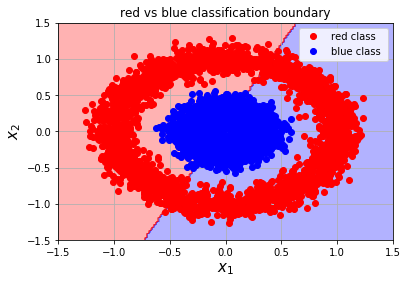

In [17]:
#Plot the resulting decision boundary
#Generate a grid over the input space to plot the color of the
#classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-2, 2, num = nb_of_xs)
xs2 = np.linspace(-2, 2, num = nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
#Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        pred = nn_predict(model, np.array([[xx[i,j], yy[i,j]]]))
        classification_plane[i, j] = pred[0, 0]
#Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha = 0.30),
        colorConverter.to_rgba('r', alpha = 0.30)])

#Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label = 'red class')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label = 'blue class ')
plt.grid()
plt.legend(loc = 1)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classification boundary')
plt.show()

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
y_test_pred = nn_predict(model, X_test)
#Show confusion table
conf_matrix = confusion_matrix(y_test, y_test_pred, labels = None)

Confusion matrix, without normalization
[[364 357]
 [441 338]]


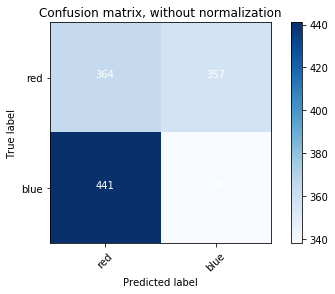

In [20]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['red', 'blue'],
                      title='Confusion matrix, without normalization')

试试加入$x_1^2$和$x_2^2$,作为feature，看效果怎么样。

### 1.3 Neural Network with Nonlinear Activation
In the previous section, we see that the logistic cannot correctly separate the two classes. The reason is that logistic regression is a linear model, which cannot separate nonlinear problem. From the classification boundary graph, we saw the separation bounday is a linear line. 

To correctly separate the two classes, we need add some nonlinear activation function and with more hidden layers. Keras offer lots of nonlinear functions: tanh, relu, sigmoid, softplus, etc. For more information, please see [Activation Functions in keras](https://keras.io/activations/).

In this part, we will use a user-defined activation function, radial basis funciton(RBF). The RBF is a transfer function that is not usually used in neural networks, except for radial basis function networks. One of the most common transfer functions in neural networks is the sigmoid function. The RBF will allow to separate the blue samples from the red samples in this simple example by only activating for a certain region around the origin. The RBF is plotted in the figure below and is defined in this example as:

$$\text{RBF} = \phi(z) = e^{-z^2} $$

The derivative of this RBF function is:

$$\frac{d \phi(z)}{dz} = -2 z e^{-z^2} = -2 z \phi(z)$$

类似高斯变换的激活函数

In [21]:
#Define the rbf function for visual purpose
def rbf_np(z):
    return np.exp(-z**2)

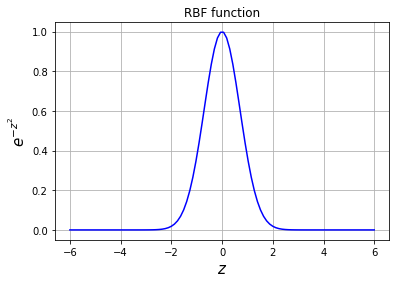

In [22]:
#Plot the rbf function
z = np.linspace(-6, 6, 100)
plt.plot(z, rbf_np(z), 'b-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$e^{-z^2}$', fontsize=15)
plt.title('RBF function')
plt.grid()
plt.show()

In [23]:
#Radius basis function for keras activation
def rbf(x):
    return K.exp(-1.0 * x ** 2)

In [24]:
#Build the model with keras' sequential model
#model = Sequential()
#model.add(Dense(3, input_dim = 2, kernel_initializer = 'glorot_normal'))
#model.add(Activation(rbf))
#model.add(Dense(1, input_dim = 3, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))
#sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
#model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = sgd)
#history = model.fit(X_train, y_train, verbose = 1, validation_data = (X_test, y_test), batch_size = 64, epochs = 10)

In [25]:
# 多一个隐藏层，并用了RBF
model = Sequential()
model.add(Dense(3, input_dim = 2, kernel_initializer = 'glorot_normal'))
model.add(Activation(rbf))
#model.add(BatchNormalization())    #加了反而更低了，没有任何作用
model.add(Dense(1, input_dim = 3, kernel_initializer = 'glorot_normal'))
model.add(Activation('sigmoid'))

In [26]:
#model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')
sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = sgd)

In [27]:
# epochs训练10遍
history = model.fit(X_train, y_train, verbose = 1, validation_data = (X_test, y_test), batch_size = 1, epochs = 10)

Train on 3500 samples, validate on 1500 samples
Epoch 1/10
3500/3500 [==============================] - 12s 3ms/step - loss: 0.4628 - acc: 0.7974 - val_loss: 0.4475 - val_acc: 0.7853
Epoch 2/10
3500/3500 [==============================] - 13s 4ms/step - loss: 0.4588 - acc: 0.7937 - val_loss: 0.4086 - val_acc: 0.8513
Epoch 3/10
3500/3500 [==============================] - 13s 4ms/step - loss: 0.4524 - acc: 0.7980 - val_loss: 0.4041 - val_acc: 0.8260
Epoch 4/10
3500/3500 [==============================] - 13s 4ms/step - loss: 0.4740 - acc: 0.7811 - val_loss: 0.4159 - val_acc: 0.8113
Epoch 5/10
3500/3500 [==============================] - 14s 4ms/step - loss: 0.4617 - acc: 0.7869 - val_loss: 0.5290 - val_acc: 0.7427
Epoch 6/10
3500/3500 [==============================] - 16s 5ms/step - loss: 0.4760 - acc: 0.7809 - val_loss: 0.4136 - val_acc: 0.8433
Epoch 7/10
3500/3500 [==============================] - 17s 5ms/step - loss: 0.4548 - acc: 0.7969 - val_loss: 0.4013 - val_acc: 0.8220
Epoch 8

In [28]:
# 实际上sgd有时也更好
model = Sequential()
model.add(Dense(3, input_dim = 2, kernel_initializer = 'glorot_normal'))
model.add(Activation(rbf))
model.add(Dense(1, input_dim = 3, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))
sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = sgd)
history = model.fit(X_train, y_train, verbose = 1, validation_data = (X_test, y_test), batch_size = 10, epochs = 10)

Train on 3500 samples, validate on 1500 samples
Epoch 1/10
3500/3500 [==============================] - 1s 408us/step - loss: 0.5462 - acc: 0.7926 - val_loss: 0.4574 - val_acc: 0.8267
Epoch 2/10
3500/3500 [==============================] - 1s 338us/step - loss: 0.4354 - acc: 0.8311 - val_loss: 0.3960 - val_acc: 0.8520
Epoch 3/10
3500/3500 [==============================] - 1s 341us/step - loss: 0.3033 - acc: 0.8963 - val_loss: 0.2305 - val_acc: 0.9393
Epoch 4/10
3500/3500 [==============================] - 1s 323us/step - loss: 0.1953 - acc: 0.9720 - val_loss: 0.1661 - val_acc: 1.0000
Epoch 5/10
3500/3500 [==============================] - 1s 319us/step - loss: 0.1524 - acc: 0.9966 - val_loss: 0.1352 - val_acc: 1.0000
Epoch 6/10
3500/3500 [==============================] - 1s 314us/step - loss: 0.1282 - acc: 0.9977 - val_loss: 0.1156 - val_acc: 1.0000
Epoch 7/10
3500/3500 [==============================] - 1s 315us/step - loss: 0.1117 - acc: 0.9980 - val_loss: 0.1024 - val_acc: 0.9993


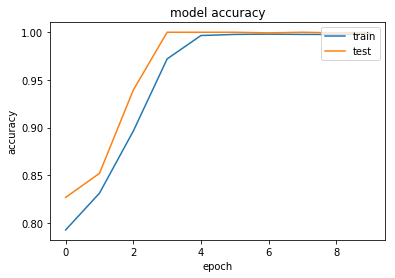

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

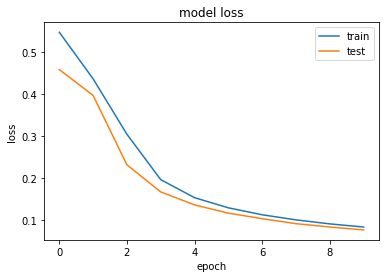

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

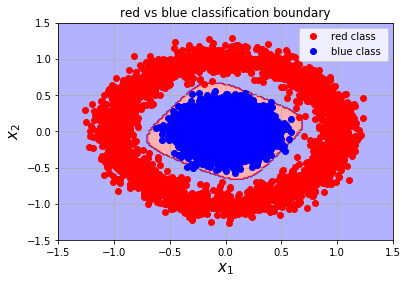

In [31]:
#Plot the resulting decision boundary
#Generate a grid over the input space to plot the color of the
#classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-2, 2, num = nb_of_xs)
xs2 = np.linspace(-2, 2, num = nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
#Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        pred = nn_predict(model, np.array([[xx[i,j], yy[i,j]]]))
        classification_plane[i, j] = pred[0, 0]
#Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha = 0.30),
        colorConverter.to_rgba('r', alpha = 0.30)])

#Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap = cmap)
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label = 'red class')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label = 'blue class ')
plt.grid()
plt.legend(loc = 1)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classification boundary')
plt.show()

出问题了，可能陷入了局部

In [32]:
t_pred = nn_predict(model, X)
#Show confusion table
conf_matrix = confusion_matrix(t, t_pred, labels = None)

Confusion matrix, without normalization
[[2498    2]
 [   3 2497]]


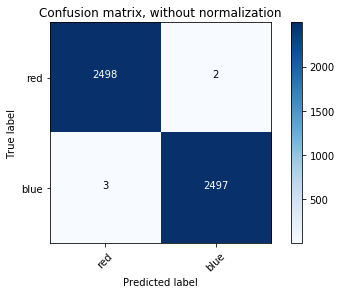

In [33]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['red', 'blue'],
                      title='Confusion matrix, without normalization')

# 2. 卷积神经网络

## 2.1 加载MNIST数据

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

下到keras目录里去了

In [35]:
X_train.shape

(60000, 28, 28)

In [36]:
def plot_figure(im, interp = False):    # 线性插值
    f = plt.figure(figsize = (3, 6))
    plt.gray()
    plt.imshow(im, interpolation = None if interp else 'none')

## 2.2 卷积

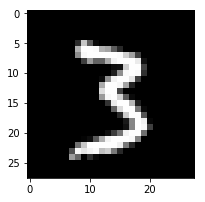

In [37]:
plot_figure(X_train[130])

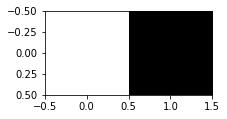

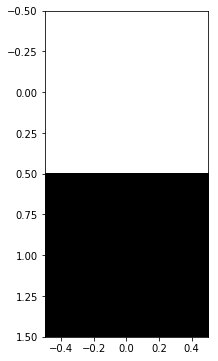

In [38]:
vertical = [[1, -1]]    #检测垂直的线

plot_figure(vertical)

horizontal = [[1], [-1]]

plot_figure(horizontal)

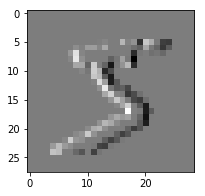

In [39]:
plot_figure(signal.convolve(X_train[0], vertical))

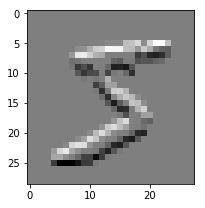

In [40]:
plot_figure(signal.convolve(X_train[0], horizontal))

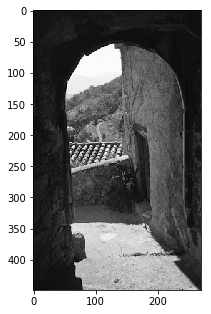

In [41]:
# Load an color image in grayscale
demo_image = cv2.imread('./imgs/demo.png',0)
plot_figure(demo_image[:, ::-1])

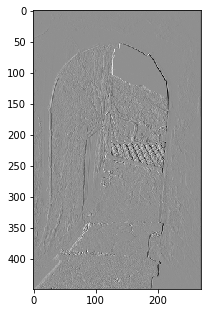

In [42]:
plot_figure(signal.convolve(demo_image, vertical))

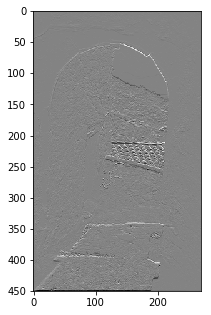

In [43]:
plot_figure(signal.convolve(demo_image, horizontal))

In [44]:
kernel = [[[1,-1],
           [-1,1]],
          [[-1,1],
           [-1,-1]],
          [[1,1],
           [-1,-1]]]
print(kernel)

[[[1, -1], [-1, 1]], [[-1, 1], [-1, -1]], [[1, 1], [-1, -1]]]


In [45]:
kernel = [[1,-1],
          [-1,1]]

(700, 1680, 3)


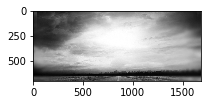

In [46]:
# Load an color image in grayscale
demo_image = cv2.imread('./imgs/page1_bg.jpg')
print(demo_image.shape)
plot_figure(demo_image[:,:,2])

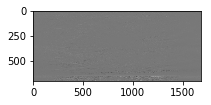

In [47]:
plot_figure(signal.convolve(demo_image[:,:,2], horizontal))

### 2.3 Simple Deep Neural Network

In [48]:
X_train.shape

(60000, 28, 28)

In [49]:
# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [50]:
num_pixels

784

In [51]:
X_train.shape

(60000, 784)

In [52]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [53]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [54]:
# one-hot
num_classes = len(set(y_train))
y_train = np_utils.to_categorical(y_train)    # 变成one-hot
y_test = np_utils.to_categorical(y_test)

In [55]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [56]:
model = Sequential()
model.add(Dense(num_pixels, input_dim = num_pixels, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [57]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 128, verbose = True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2507 - acc: 0.9280 - val_loss: 0.1238 - val_acc: 0.9621
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0969 - acc: 0.9718 - val_loss: 0.0855 - val_acc: 0.9746
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0614 - acc: 0.9826 - val_loss: 0.0730 - val_acc: 0.9776
Epoch 4/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0434 - acc: 0.9870 - val_loss: 0.0791 - val_acc: 0.9764
Epoch 5/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0310 - acc: 0.9910 - val_loss: 0.0767 - val_acc: 0.9761
Epoch 6/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0219 - acc: 0.9939 - val_loss: 0.0614 - val_acc: 0.9821
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0165 - acc: 0.9954 - val_loss: 0.0653 - val_acc

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [60]:
# create model
model = Sequential()
model.add(Dense(num_pixels, input_dim = num_pixels, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
# Compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [61]:
# Fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200, verbose = 1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Baseline Error: %.2f%%" % (100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2808 - acc: 0.9204 - val_loss: 0.1460 - val_acc: 0.9580
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1128 - acc: 0.9680 - val_loss: 0.0955 - val_acc: 0.9707
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0725 - acc: 0.9795 - val_loss: 0.0875 - val_acc: 0.9733
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0527 - acc: 0.9846 - val_loss: 0.0707 - val_acc: 0.9778
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0383 - acc: 0.9890 - val_loss: 0.0671 - val_acc: 0.9782
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0290 - acc: 0.9920 - val_loss: 0.0667 - val_acc: 0.9786
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0220 - acc: 0.9940 - val_loss: 0.0670 - val_acc

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


784*10再加上常数项是7850

## 2.4 Convolution Neural Network

In [63]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [64]:
X_train.shape

(60000, 28, 28, 1)

In [66]:
model = Sequential()
model.add(Conv2D(32, 3, input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
# Fit the model
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs = 10, 
          batch_size = 128)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.1744 - acc: 0.9454 - val_loss: 0.0529 - val_acc: 0.9838
Epoch 2/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0440 - acc: 0.9861 - val_loss: 0.0387 - val_acc: 0.9865
Epoch 3/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0296 - acc: 0.9910 - val_loss: 0.0265 - val_acc: 0.9900
Epoch 4/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0237 - val_acc: 0.9924
Epoch 5/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0177 - acc: 0.9945 - val_loss: 0.0280 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0265 - val_acc: 0.9924
Epoch 7/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0117 - acc: 0.9965 - val_loss: 0.

In [68]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
# model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
# model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(num_classes, activation = 'softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
# Fit the model
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs = 10, 
          batch_size = 200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0035 - acc: 0.9988 - val_loss: 0.0276 - val_acc: 0.9938
Epoch 2/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0298 - val_acc: 0.9934
Epoch 3/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0301 - val_acc: 0.9935
Epoch 4/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0031 - acc: 0.9990 - val_loss: 0.0304 - val_acc: 0.9940
Epoch 5/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0038 - acc: 0.9989 - val_loss: 0.0263 - val_acc: 0.9946
Epoch 6/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0298 - val_acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0044 - acc: 0.9986 - val_loss: 0.

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

卷积深度深，参数还少